# 특성공학 
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

## Sklearn Preprocessing data
https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings(action='ignore') 
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


<AxesSubplot:>

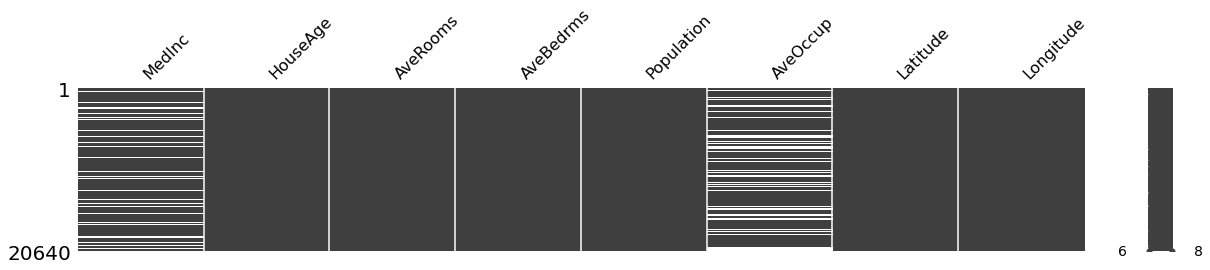

In [3]:
import missingno as msno
np.random.seed(1024)
missing_features = df.loc[:, ['MedInc', 'AveOccup']]
missing_features = missing_features.mask(np.random.random(missing_features.shape) < .2)
df[missing_features.columns] = missing_features
msno.matrix(df, figsize=(20,3))

## 1. 결측치 처리

In [4]:
from sklearn import impute
data= df.copy()
sel_cols = ['MedInc', 'AveOccup']
imp = impute.SimpleImputer(missing_values=np.nan, strategy='mean') # (strategy='constant', fill_value= 100)
data.loc[:, sel_cols] = imp.fit(data.loc[:, sel_cols]).transform(data.loc[:, sel_cols])
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.325200,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.301400,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.257400,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.865772,52.0,5.817352,1.073059,558.0,3.105826,37.85,-122.25
4,3.865772,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
data= df.copy()
imp = impute.KNNImputer(n_neighbors=3, weights="uniform")
data.loc[:, sel_cols] = imp.fit(data.loc[:, sel_cols]).transform(data.loc[:, sel_cols])
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.325200,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.301400,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.257400,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.865772,52.0,5.817352,1.073059,558.0,3.105826,37.85,-122.25
4,2.543900,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## 2. 수치형 데이터 처리
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [6]:
from sklearn import preprocessing
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
data= df.copy()
std = preprocessing.StandardScaler()
data.loc[:, sel_cols] = std.fit(data.loc[:, sel_cols].values).transform(data.loc[:, sel_cols].values)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.340356,41.0,6.984127,1.023810,322.0,-0.047459,37.88,-122.23
1,2.327866,21.0,6.238137,0.971880,2401.0,-0.085900,37.86,-122.22
2,1.779963,52.0,8.288136,1.073446,496.0,-0.026182,37.85,-122.24
3,NaN,52.0,5.817352,1.073059,558.0,NaN,37.85,-122.25
4,NaN,52.0,6.281853,1.081081,565.0,-0.079723,37.85,-122.25


In [7]:
data= df.copy()
std = preprocessing.MinMaxScaler()
data.loc[:, sel_cols] = std.fit(data.loc[:, sel_cols]).transform(data.loc[:, sel_cols])
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,41.0,6.984127,1.023810,322.0,0.001203,37.88,-122.23
1,0.538027,21.0,6.238137,0.971880,2401.0,0.000845,37.86,-122.22
2,0.466028,52.0,8.288136,1.073446,496.0,0.001402,37.85,-122.24
3,NaN,52.0,5.817352,1.073059,558.0,NaN,37.85,-122.25
4,NaN,52.0,6.281853,1.081081,565.0,0.000902,37.85,-122.25


array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'AveOccup'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'AveOccup'}>]], dtype=object)

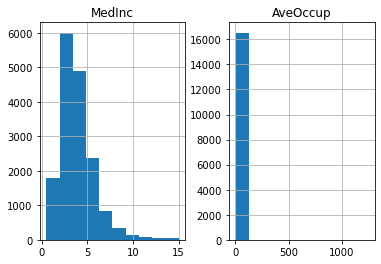

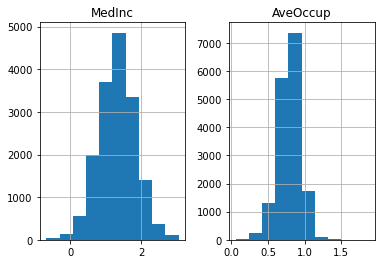

In [8]:
data= df.copy()
data.loc[:, sel_cols].hist()
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
data.loc[:, sel_cols] = pt.fit(data.loc[:, sel_cols]).transform(data.loc[:, sel_cols])
data.loc[:, sel_cols].hist()

## 5. K-bins discretization
-Discretization
각 컬럼을 bin의 개수로 만들어 생성

In [9]:
dataset = fetch_california_housing()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
est = preprocessing.KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
df.loc[:, sel_cols] = est.fit(df.loc[:, sel_cols]).transform(df.loc[:, sel_cols])

In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.0,41.0,6.984127,1.023810,322.0,0.0,37.88,-122.23
1,5.0,21.0,6.238137,0.971880,2401.0,0.0,37.86,-122.22
2,4.0,52.0,8.288136,1.073446,496.0,0.0,37.85,-122.24
3,3.0,52.0,5.817352,1.073059,558.0,0.0,37.85,-122.25
4,2.0,52.0,6.281853,1.081081,565.0,0.0,37.85,-122.25


## 3. 범주형 데이터처리(Encoding categorical features)

In [11]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='mushroom')
data.url
data.keys()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()
df.target.value_counts()

'https://www.openml.org/d/24'

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,target
0,5.0,2.0,4.0,1.0,6.0,2.0,0.0,1.0,4.0,0.0,...,7.0,7.0,0.0,2.0,1.0,5.0,2.0,3.0,5.0,p
1,5.0,2.0,9.0,1.0,0.0,2.0,0.0,0.0,4.0,0.0,...,7.0,7.0,0.0,2.0,1.0,5.0,3.0,2.0,1.0,e
2,0.0,2.0,8.0,1.0,3.0,2.0,0.0,0.0,5.0,0.0,...,7.0,7.0,0.0,2.0,1.0,5.0,3.0,2.0,3.0,e
3,5.0,3.0,8.0,1.0,6.0,2.0,0.0,1.0,5.0,0.0,...,7.0,7.0,0.0,2.0,1.0,5.0,2.0,3.0,5.0,p
4,5.0,2.0,3.0,0.0,5.0,2.0,2.0,0.0,4.0,1.0,...,7.0,7.0,0.0,2.0,1.0,1.0,3.0,0.0,1.0,e


e    4208
p    3916
Name: target, dtype: int64

## 1. One Hot Encoding

In [12]:
sel_col =['cap-shape', 'cap-surface'] 
data=df[sel_col] # data..nunique(), 6개, 4개 고유 범주 유형
data.head()
pd.get_dummies(data, columns=['cap-shape', 'cap-surface']).head()

,cap-shape,cap-surface
0,5.0,2.0
1,5.0,2.0
2,0.0,2.0
3,5.0,3.0
4,5.0,2.0


,cap-shape_0.0,cap-shape_1.0,cap-shape_2.0,cap-shape_3.0,cap-shape_4.0,cap-shape_5.0,cap-surface_0.0,cap-surface_1.0,cap-surface_2.0,cap-surface_3.0
0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,1,0,0,1,0


In [13]:
ohc = preprocessing.OneHotEncoder()
ohc.fit(data).transform(data).toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

## 2. Label encoding

In [14]:
la = preprocessing.LabelEncoder()
df['target'] = la.fit_transform(df['target'])

## 3. Frequency Encoding

In [15]:
fe = df.groupby('cap-surface').size()/len(df)
df['cap-surface'].map(fe) #df.loc[:, 'cap-surface'] = df['cap-surface'].map(fe)

0       0.314623
1       0.314623
2       0.314623
3       0.399311
4       0.314623
          ...   
8119    0.314623
8120    0.314623
8121    0.314623
8122    0.399311
8123    0.314623
Name: cap-surface, Length: 8124, dtype: float64

## 4. Target Mean Encoding

In [16]:
target_mean = df.groupby(['cap-surface'])['target'].mean()
df['cap-surface'].map(target_mean) # map 유용한 기능

0       0.552426
1       0.552426
2       0.552426
3       0.536375
4       0.552426
          ...   
8119    0.552426
8120    0.552426
8121    0.552426
8122    0.536375
8123    0.552426
Name: cap-surface, Length: 8124, dtype: float64

In [17]:
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'target'],
      dtype='object')

In [18]:
tm = pd.DataFrame(df.groupby(['cap-surface', 'cap-color'])['target'].mean()).reset_index()
tm.head() # tm[~tm.isnull()]
df.merge(tm, on =['cap-surface', 'cap-color'], 
         how='left', suffixes=('', '_tm')).iloc[:4, 20:]

,cap-surface,cap-color,target
0,0.0,1.0,0.000000
1,0.0,2.0,0.000000
2,0.0,3.0,0.399103
3,0.0,4.0,0.016529
4,0.0,5.0,1.000000


,population,habitat,target,target_tm
0,3.0,5.0,1,0.582160
1,2.0,1.0,0,0.000000
2,2.0,3.0,0,0.366906
3,3.0,5.0,1,0.357143


In [20]:
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,target
0,5.0,2.0,4.0,1.0,6.0,2.0,0.0,1.0,4.0,0.0,...,7.0,7.0,0.0,2.0,1.0,5.0,2.0,3.0,5.0,1
1,5.0,2.0,9.0,1.0,0.0,2.0,0.0,0.0,4.0,0.0,...,7.0,7.0,0.0,2.0,1.0,5.0,3.0,2.0,1.0,0
2,0.0,2.0,8.0,1.0,3.0,2.0,0.0,0.0,5.0,0.0,...,7.0,7.0,0.0,2.0,1.0,5.0,3.0,2.0,3.0,0
3,5.0,3.0,8.0,1.0,6.0,2.0,0.0,1.0,5.0,0.0,...,7.0,7.0,0.0,2.0,1.0,5.0,2.0,3.0,5.0,1
4,5.0,2.0,3.0,0.0,5.0,2.0,2.0,0.0,4.0,1.0,...,7.0,7.0,0.0,2.0,1.0,1.0,3.0,0.0,1.0,0


# Data preprocessing practice

In [219]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X.head(2)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


<AxesSubplot:>

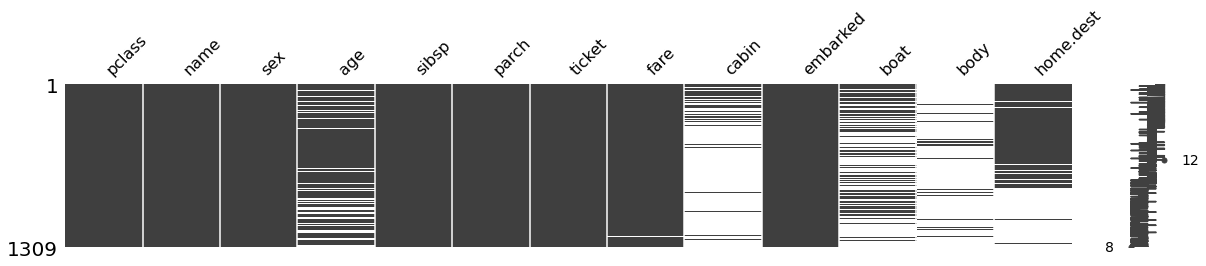

In [220]:
msno.matrix(X, figsize=(20,3))

In [221]:
X.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [222]:
X['age'] = X['age'].fillna(X['age'].mean())
X['fare'] = X['fare'].fillna(X['fare'].mean())

In [223]:
X['age'] = (X['age'] - X['age'].mean())/X['age'].std()
X['fare'] = (X['fare'] - X['fare'].mean())/X['fare'].std()
X.describe()

,pclass,age,sibsp,parch,fare,body
count,1309.000000,1.309000e+03,1309.000000,1309.000000,1.309000e+03,121.000000
mean,2.294882,1.862123e-14,0.498854,0.385027,-4.927940e-15,160.809917
std,0.837836,1.000000e+00,1.041658,0.865560,1.000000e+00,97.696922
min,1.000000,-2.306448e+00,0.000000,0.000000,-6.435292e-01,1.000000
25%,2.000000,-6.117374e-01,0.000000,0.000000,-4.909206e-01,72.000000
50%,3.000000,1.902767e-14,0.000000,0.000000,-3.641609e-01,155.000000
75%,3.000000,3.973288e-01,1.000000,0.000000,-3.905147e-02,256.000000
max,3.000000,3.890250e+00,8.000000,9.000000,9.258680e+00,328.000000


In [224]:
X['embarked'].mode()[0]
X['embarked'].mode()

'S'

0    S
Name: embarked, dtype: category
Categories (3, object): ['C', 'Q', 'S']

In [225]:
categorical_features = ['embarked', 'sex', 'pclass']
for col in categorical_features:
    X[col].mode()[0]
    X[col] = X[col].fillna(X[col].mode()[0])

'S'

'male'

3.0

In [226]:
X.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [227]:
X = X.drop(['name', 'cabin', 'ticket', 'boat', 'body', 'home.dest'], axis=1)
X.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

clf = LogisticRegression()
clf.fit(X_train, y_train)
print(f'model score: {clf.score(X_test, y_test):.3f}')

ValueError: could not convert string to float: 'male'

In [229]:
X.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [230]:
X['sex'].replace({'female': 0, 'male': 1}, inplace=True)

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(f'model score: {clf.score(X_test, y_test):.3f}')

ValueError: could not convert string to float: 'S'

In [232]:
for col in X:
    if X[col].dtype != 'float64':
        col
        X[col].unique()

'sex'

array([0, 1], dtype=int64)

'embarked'

['S', 'C', 'Q']
Categories (3, object): ['C', 'Q', 'S']

In [233]:
pd.get_dummies(X).head() # (X, prefix=['col1', 'col2'])

,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1.0,0,-0.068394,0.0,0.0,3.441165,0,0,1
1,1.0,1,-2.248233,1.0,2.0,2.285603,0,0,1
2,1.0,0,-2.164147,1.0,2.0,2.285603,0,0,1
3,1.0,1,0.009226,1.0,2.0,2.285603,0,0,1
4,1.0,0,-0.378876,1.0,2.0,2.285603,0,0,1


In [234]:
X['pclass'] = X['pclass'].astype('category')
X['sex'] = X['sex'].astype('category')

In [235]:
X = pd.get_dummies(X)
X.head()

,age,sibsp,parch,fare,pclass_1.0,pclass_2.0,pclass_3.0,sex_0,sex_1,embarked_C,embarked_Q,embarked_S
0,-0.068394,0.0,0.0,3.441165,1,0,0,1,0,0,0,1
1,-2.248233,1.0,2.0,2.285603,1,0,0,0,1,0,0,1
2,-2.164147,1.0,2.0,2.285603,1,0,0,1,0,0,0,1
3,0.009226,1.0,2.0,2.285603,1,0,0,0,1,0,0,1
4,-0.378876,1.0,2.0,2.285603,1,0,0,1,0,0,0,1


In [236]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1309 non-null   float64
 1   sibsp       1309 non-null   float64
 2   parch       1309 non-null   float64
 3   fare        1309 non-null   float64
 4   pclass_1.0  1309 non-null   uint8  
 5   pclass_2.0  1309 non-null   uint8  
 6   pclass_3.0  1309 non-null   uint8  
 7   sex_0       1309 non-null   uint8  
 8   sex_1       1309 non-null   uint8  
 9   embarked_C  1309 non-null   uint8  
 10  embarked_Q  1309 non-null   uint8  
 11  embarked_S  1309 non-null   uint8  
dtypes: float64(4), uint8(8)
memory usage: 51.3 KB


In [237]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(f'model score: {clf.score(X_test, y_test):.3f}')

LogisticRegression()

model score: 0.790


## Column Transformer

In [243]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

X = X.drop(['name', 'cabin', 'ticket', 'boat', 'body', 'home.dest'], axis=1)
X.head(2)

,pclass,sex,age,sibsp,parch,fare,embarked
0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,male,0.9167,1.0,2.0,151.5500,S


In [244]:
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='median')),
    ('scaler', preprocessing.StandardScaler())])

categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer =  Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='most_frequent')),
    ('scaler', preprocessing.OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [245]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

clf.fit(X_train, y_train)
print(f'model score: {clf.score(X_test, y_test):.3f}')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['embarked', 'se

model score: 0.790


# END